# **CSE-221710310017-GAJJALA MAANSI**

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
!ls 'My Drive/2020/Courses Taken/AI-ML/Assignments'

 01.06.2020.gdoc   09.07.2020.gdoc	     20.06.2020.gdoc
 01.07.2020.gdoc   10.06.2020.gdoc	     22.06.2020.gdoc
 02.06.2020.gdoc  '10.07.2020 assgn.ipynb'   23.06.2020.gdoc
 02.07.2020.gdoc   10.07.2020.gdoc	     24.06.2020.gdoc
 03.06.2020.gdoc   11.06.2020.gdoc	     25.06.2020.gdoc
 03.07.2020.gdoc  '11.07.2020 assgn.ipynb'   26.06.2020.gdoc
 04.06.2020.gdoc   11.07.2020.gdoc	     27.05.2020.gdoc
 04.07.2020.gdoc   12.06.2020.gdoc	     27.06.2020.gdoc
 05.06.2020.gdoc   13.07.2020.gdoc	     28.05.2020.gdoc
 06.06.2020.gdoc   15.06.2020.gdoc	     29.05.2020.gdoc
 06.07.2020.gdoc   16.06.2020.gdoc	     29.06.2020.gdoc
 07.07.2020.gdoc  '16.07.2020 assgn.ipynb'   30.05.2020.gdoc
 08.06.2020.gdoc   17.06.2020.gdoc	     30.06.2020.gdoc
 08.07.2020.gdoc   18.06.2020.gdoc	     all_stocks_5yr.csv
 09.06.2020.gdoc   19.06.2020.gdoc	     Untitled


In [4]:
#all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/2020/Courses Taken/AI-ML/Assignments/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [5]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [7]:
data['Name'].value_counts()

GD      1259
PLD     1259
CVS     1259
DRE     1259
IPG     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [8]:
### How many company's data we have here?
data.Name.nunique()

505

In [9]:
## Selecting the data AAL
df = data[data['Name']=='TDG']
df.shape

(1259, 7)

In [10]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [11]:
#select the columns data and close price
df = df[['date','close']]
df

,date,close
533033,2013-02-08,143.05
533034,2013-02-11,145.18
533035,2013-02-12,144.91
533036,2013-02-13,144.75
533037,2013-02-14,143.44
...,...,...
534287,2018-02-01,315.20
534288,2018-02-02,307.28
534289,2018-02-05,296.86
534290,2018-02-06,290.66


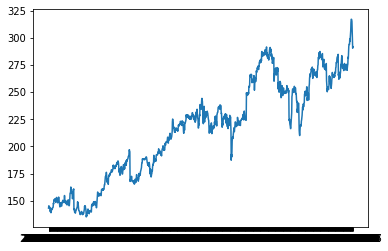

In [12]:
#line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [13]:
df.date[:10]

533033    2013-02-08
533034    2013-02-11
533035    2013-02-12
533036    2013-02-13
533037    2013-02-14
533038    2013-02-15
533039    2013-02-19
533040    2013-02-20
533041    2013-02-21
533042    2013-02-22
Name: date, dtype: object

In [14]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [15]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]

X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+533040]) 
print(X[:2])

[533033    143.05
533034    145.18
533035    144.91
533036    144.75
533037    143.44
533038    143.77
533039    143.05
Name: close, dtype: float64, 533034    145.18
533035    144.91
533036    144.75
533037    143.44
533038    143.77
533039    143.05
533040    139.86
Name: close, dtype: float64]


In [16]:
import numpy as np
X = np.array(X)

In [17]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,143.05,145.18,144.91,144.75,143.44,143.77,143.05
1,145.18,144.91,144.75,143.44,143.77,143.05,139.86
2,144.91,144.75,143.44,143.77,143.05,139.86,141.16
3,144.75,143.44,143.77,143.05,139.86,141.16,142.74
4,143.44,143.77,143.05,139.86,141.16,142.74,138.83


In [18]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,143.05,145.18,144.91,144.75,143.44,143.77,143.05,139.86
1,145.18,144.91,144.75,143.44,143.77,143.05,139.86,141.16
2,144.91,144.75,143.44,143.77,143.05,139.86,141.16,142.74
3,144.75,143.44,143.77,143.05,139.86,141.16,142.74,138.83
4,143.44,143.77,143.05,139.86,141.16,142.74,138.83,139.18


In [19]:
df1.shape

(1251, 8)

In [20]:
1251 * 0.8

1000.8000000000001

In [21]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [22]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.720846e-16,1.534328e-16,3.625433e-16,2.612355e-16,-8.598677e-17,-2.949863e-16,-5.948575e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.600751e+00,-1.603999e+00,-1.607093e+00,-1.610251e+00,-1.613449e+00,-1.616778e+00,-1.620099e+00
25%,-8.198877e-01,-8.186102e-01,-8.187042e-01,-8.178015e-01,-8.184258e-01,-8.163165e-01,-8.152131e-01
50%,8.418603e-02,8.986731e-02,9.620145e-02,9.806986e-02,1.027375e-01,1.064700e-01,1.091178e-01
75%,6.105218e-01,6.093527e-01,6.081976e-01,6.069466e-01,6.056328e-01,6.042101e-01,6.034346e-01
max,2.112597e+00,2.112840e+00,2.113002e+00,2.113046e+00,2.113012e+00,2.112884e+00,2.112439e+00


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mse')

In [25]:
X_test.shape

(251, 7)

In [26]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [27]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 40843.4160 - val_loss: 57934.6824
Epoch 2/100
1000/1000 [==============================] - 1s 882us/step - loss: 32032.8005 - val_loss: 52901.1840
Epoch 3/100
1000/1000 [==============================] - 1s 919us/step - loss: 28439.1187 - val_loss: 48705.2085
Epoch 4/100
1000/1000 [==============================] - 1s 915us/step - loss: 25604.7577 - val_loss: 45007.4547
Epoch 5/100
1000/1000 [==============================] - 1s 918us/step - loss: 23104.1193 - val_loss: 41686.8983
Epoch 6/100
1000/1000 [==============================] - 1s 887us/step - loss: 20869.6295 - val_loss: 38591.9028
Epoch 7/100
1000/1000 [==============================] - 1s 902us/step - loss: 18824.2136 - val_loss: 35752.4537
Epoch 8/100
1000/1000 [==============================] - 1s 944us/step - loss: 16961.2358 - val_loss: 33098.7869
Epoch 9/100
1000/1000 [============================

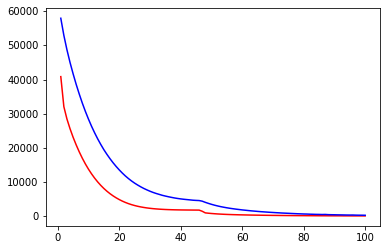

In [28]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [29]:
model.predict(X_test_sc)

array([[225.34958],
       [227.8175 ],
       [230.91743],
       [234.88144],
       [240.19713],
       [246.77875],
       [252.21721],
       [254.64658],
       [255.73091],
       [255.35162],
       [254.81526],
       [255.07777],
       [255.63368],
       [256.3319 ],
       [257.5491 ],
       [258.3182 ],
       [257.53168],
       [256.50092],
       [256.36588],
       [256.2393 ],
       [254.23038],
       [251.04073],
       [247.60393],
       [244.55913],
       [241.25601],
       [238.67555],
       [236.66747],
       [235.15784],
       [234.24606],
       [234.13899],
       [234.08904],
       [234.22667],
       [232.76837],
       [228.94075],
       [224.00797],
       [219.93465],
       [218.7991 ],
       [219.83955],
       [221.2615 ],
       [222.84795],
       [223.82607],
       [224.42725],
       [225.20264],
       [226.47508],
       [228.01552],
       [229.66449],
       [231.11174],
       [233.0721 ],
       [234.74182],
       [235.80719],


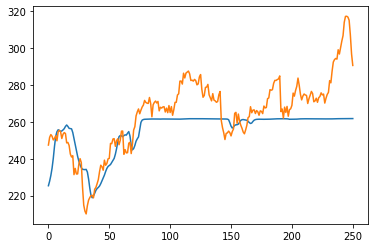

In [30]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [31]:
X_test_sc[0].reshape(1,7,1)

array([[[0.33250006],
        [0.32609397],
        [0.40247429],
        [0.45065217],
        [0.52973531],
        [0.66566974],
        [1.01958876]]])

In [32]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[225.3495]], dtype=float32)

In [33]:
y_test[1000]

247.43

### **Create a Model**

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


### **Compile the model with the proper optimizer and loss**


In [35]:
model2.compile(optimizer='adam',loss='mse')

In [36]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 40741.1283 - val_loss: 58385.6563
Epoch 2/100
1000/1000 [==============================] - 1s 932us/step - loss: 32305.9732 - val_loss: 53511.0575
Epoch 3/100
1000/1000 [==============================] - 1s 898us/step - loss: 28954.8520 - val_loss: 49453.7231
Epoch 4/100
1000/1000 [==============================] - 1s 920us/step - loss: 26183.6119 - val_loss: 45892.3310
Epoch 5/100
1000/1000 [==============================] - 1s 944us/step - loss: 23753.9152 - val_loss: 42661.3173
Epoch 6/100
1000/1000 [==============================] - 1s 967us/step - loss: 21625.5608 - val_loss: 39688.4706
Epoch 7/100
1000/1000 [==============================] - 1s 918us/step - loss: 19572.0019 - val_loss: 36891.9311
Epoch 8/100
1000/1000 [==============================] - 1s 919us/step - loss: 17782.0843 - val_loss: 34270.1912
Epoch 9/100
1000/1000 [============================

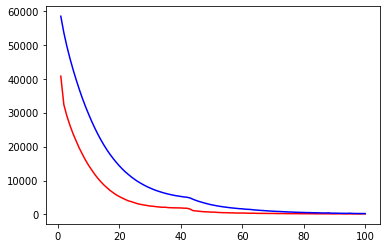

In [37]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

### **Evaluate the model with test data**

In [38]:
model2.predict(X_test_sc)

array([[219.8367 ],
       [221.6824 ],
       [224.40344],
       [227.90692],
       [233.61778],
       [241.45892],
       [249.43533],
       [252.20538],
       [254.11938],
       [254.10529],
       [253.29767],
       [253.13464],
       [253.74316],
       [254.21317],
       [255.08939],
       [256.80374],
       [256.2155 ],
       [254.92218],
       [254.33386],
       [254.90073],
       [253.80563],
       [251.15637],
       [247.80936],
       [245.67053],
       [242.20822],
       [239.16733],
       [236.91803],
       [234.40135],
       [231.78003],
       [231.84796],
       [231.61293],
       [233.17355],
       [234.27101],
       [231.63214],
       [225.60435],
       [218.46335],
       [214.3163 ],
       [213.99974],
       [215.79929],
       [218.4397 ],
       [219.9602 ],
       [220.7248 ],
       [221.15356],
       [221.91614],
       [223.31274],
       [225.37799],
       [226.81805],
       [229.03052],
       [231.49255],
       [233.6377 ],


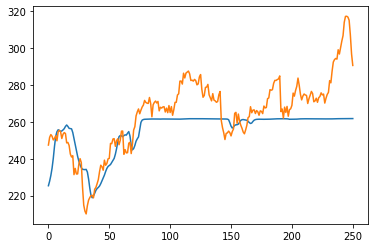

In [39]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)